In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv("sales.csv", encoding='ISO-8859-1')

In [6]:
# Select relevant numerical columns (based on your description)
# Example columns: QUANTITYORDERED, PRICEEACH, SALES, MSRP (you can include more or less depending on your needs)
columns_of_interest = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
data_subset = data[columns_of_interest]

In [7]:
# Handle any missing values (if any)
data_subset = data_subset.dropna()

In [8]:
# Scaling the data for better clustering results
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

In [9]:
# Elbow Method to determine optimal K
inertia = []
K_range = range(1, 11)  # Trying K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

/home/sahil/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sahil/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sahil/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sahil/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sahil/.local/lib/python3.10/si

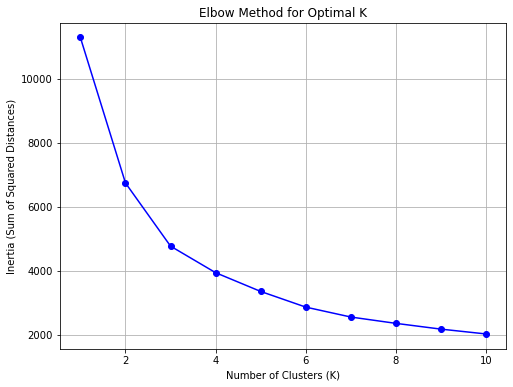

In [10]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

In [19]:
# From the elbow plot, identify the optimal number of clusters (usually where the curve bends)

# Let's assume the optimal K from the plot is 3 (replace with actual optimal K after viewing the plot)
optimal_k = 4

In [20]:
# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

/home/sahil/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [21]:
# Add cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

# View the clustering result
print(data[['ORDERNUMBER', 'SALES', 'Cluster']].head())  # You can adjust this to include more details

   ORDERNUMBER    SALES  Cluster
0        10107  2871.00        2
1        10121  2765.90        2
2        10134  3884.34        3
3        10145  3746.70        3
4        10159  5205.27        1
